In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt

# KNN : Sınıflandırma Problemi İçin

In [ ]:
# Göğüs kanseri veri setini kullanarak ikili sınıflandırma problemi çözeriz. 

### Veri Seti İncelemesi

In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(data = cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# malignant : kötü huylu (1)       benign : iyi huylu (0)

In [5]:
df["target"] = cancer.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Makine Öğrenmesi Modelinin Seçilmesi

In [ ]:
# KNN sınıflandırıcı modelini seçeriz.

### Modelin Train Edilmesi

In [7]:
X= cancer.data     # features
y= cancer.target   # target

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)  

In [9]:
# ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# model oluşturma ve modelin train edilmesi
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Modelin test edilmesi ve sonuçların değerlendirilmesi

In [11]:
y_pred = knn.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.9590643274853801

In [13]:
conf_matrix = confusion_matrix(y_test , y_pred)
conf_matrix

array([[ 59,   4],
       [  3, 105]], dtype=int64)

### Hiperparametre Ayarlaması

In [ ]:
# KNN : hyperparameter= K   
# Her bir k değerine karşılık gelen accuracy değerlerini grafikleştiririz.Yüksek accuracy değerleri için en iyi k değerlerini
# görürüz. Yüksek accuracy değerleri için k=9,10,11,12 seçilebilir.

In [14]:
accuracy_values = []
k_values = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train) 
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test , y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

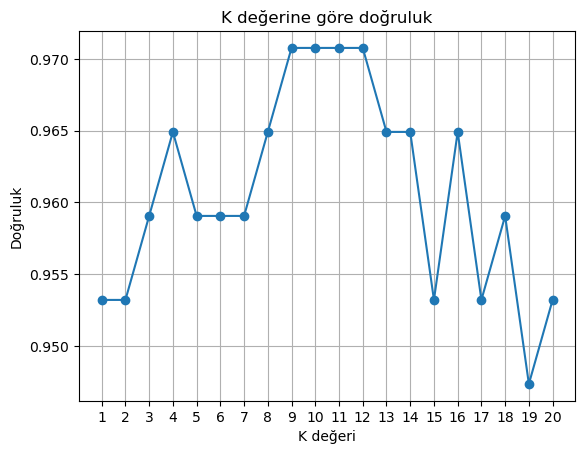

In [15]:
plt.figure()
plt.plot(k_values,accuracy_values, marker="o",linestyle="-")
plt.title("K değerine göre doğruluk")
plt.xlabel("K değeri")
plt.ylabel("Doğruluk")
plt.xticks(k_values)
plt.grid(True)

# KNN : Regresyon Problemi İçin

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [17]:
X = np.sort(5 * np.random.rand(40,1),axis=0)   # feature
y = np.sin(X).ravel()  # target

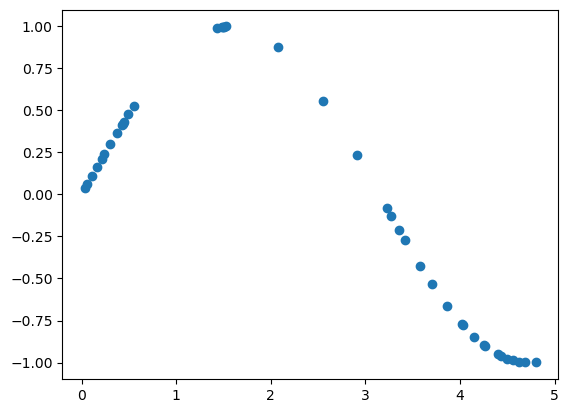

In [18]:
plt.scatter(X,y)

In [19]:
# add noise
y[::5] += 1 * (0.5 - np.random.rand(8))

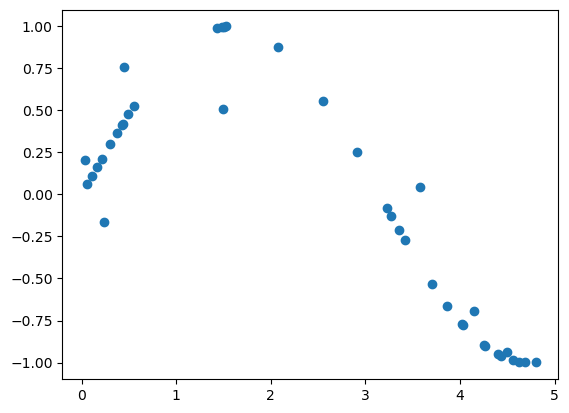

In [20]:
plt.scatter(X,y)

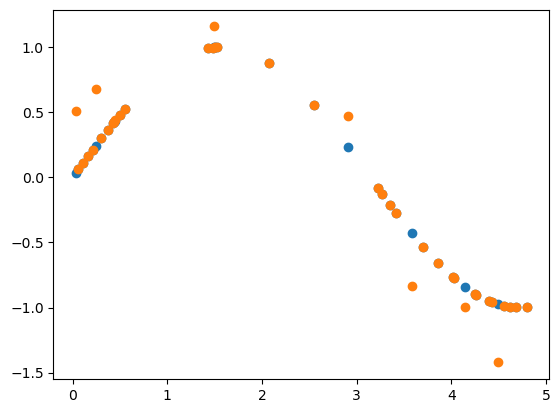

In [21]:
y = np.sin(X).ravel()
plt.scatter(X,y)
y[::5] += 1 * (0.5 - np.random.rand(8))   # add noise
plt.scatter(X,y)

In [22]:
T = np.linspace(0,5,500)[:,np.newaxis]   # test veri seti

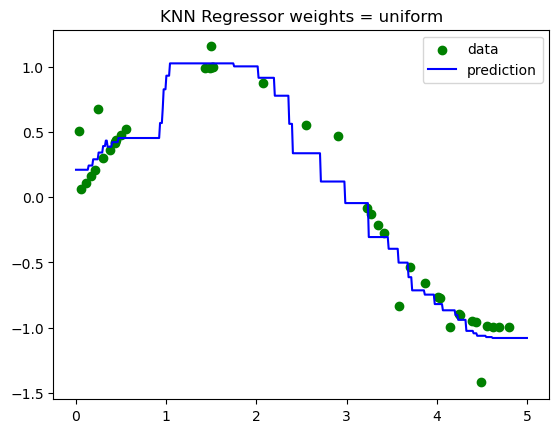

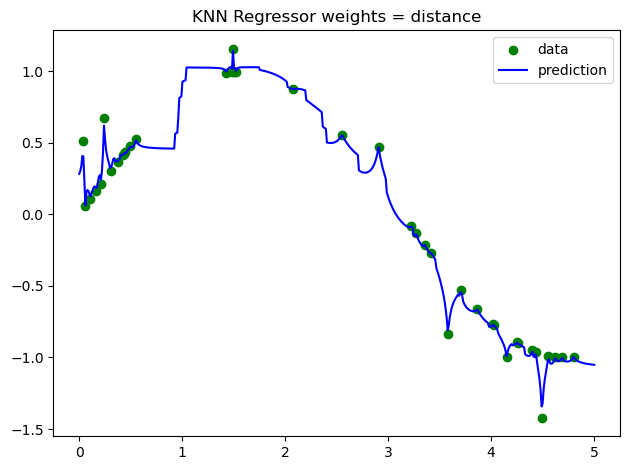

In [23]:
for weight in ["uniform","distance"]:
    knn = KNeighborsRegressor(n_neighbors=5,weights=weight)
    y_pred = knn.fit(X,y).predict(T)
    
    plt.figure()
    plt.scatter(X,y,color="green",label="data")
    plt.plot(T,y_pred,color="blue",label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNN Regressor weights = {}".format(weight))

plt.tight_layout()
plt.show()